In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df=pd.read_csv("maintenance.csv")
df = df.drop(["UDI","Product ID"],axis=1)
df.tail(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,M,299.0,308.7,1500,40.2,30,0,No Failure


In [3]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(2)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,298.1,308.6,1551,42.8,0,0,1
1,2,298.2,308.7,1408,46.3,3,0,1


In [19]:
# Generate some random data
X = df.drop(['Failure Type','Target'], axis=1)
y = df['Target']


# bosting  : 

Training Accuracy    : 97.625 %
Model Accuracy Score : 97.7 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.67      0.49      0.57        61

    accuracy                           0.98      2000
   macro avg       0.83      0.74      0.78      2000
weighted avg       0.97      0.98      0.98      2000

--------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


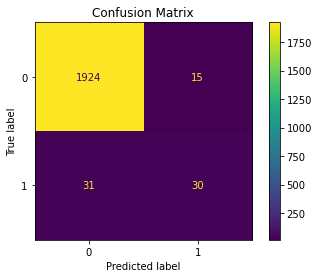

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a boosting classifier
svc = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the boosting classifier
svc.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svc = svc.predict(X_test)

# Evaluate the performance of the model
svc_train = svc.score(X_train, y_train) * 100
svc_accuracy = accuracy_score(y_test, y_pred_svc) * 100

print("Training Accuracy    :", svc_train ,"%")
print("Model Accuracy Score :", svc_accuracy ,"%")

# Display classification report and confusion matrix
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(svc, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


# bagging : 

Training Accuracy    : 97.0 %
Model Accuracy Score : 97.35000000000001 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.68      0.25      0.36        61

    accuracy                           0.97      2000
   macro avg       0.83      0.62      0.67      2000
weighted avg       0.97      0.97      0.97      2000

--------------------------------------------------------


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


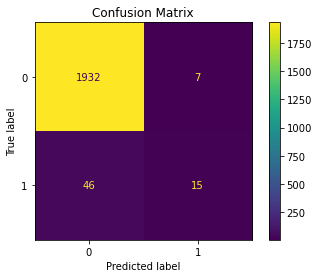

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a support vector machine classifier as the base estimator
svc = SVC(kernel='linear', C=1, random_state=42)

# Train the SVC classifier
svc.fit(X_train, y_train)

# Create a bagging classifier
bagging_svc = BaggingClassifier(base_estimator=svc, n_estimators=10, random_state=42)

# Train the bagging classifier
bagging_svc.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = bagging_svc.predict(X_test)

# Evaluate the model
svc_train = svc.score(X_train, y_train)*100
svc_accuracy = accuracy_score(y_test, y_pred_svc)*100

print("Training Accuracy    :", svc_train, "%")
print("Model Accuracy Score :", svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(bagging_svc, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()


# stacking : 

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from mlxtend.classifier import StackingClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base classifiers
rf = RandomForestClassifier(n_estimators=50, random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(random_state=42)

# Initialize the stacking classifier
sclf = StackingClassifier(classifiers=[rf, gb], meta_classifier=lr)

# Fit the stacking classifier to the training data
sclf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = sclf.predict(X_test)

# Calculate the accuracy of the model
svc_train = round(sclf.score(X_train, y_train)*100,2)
svc_accuracy = round(accuracy_score(y_test, y_pred)*100,2)

# Print the evaluation metrics
print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred))
print("\033[1m--------------------------------------------------------\033[0m")


Training Accuracy    : 99.99 %
Model Accuracy Score : 98.55 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.86      0.62      0.72        61

    accuracy                           0.99      2000
   macro avg       0.93      0.81      0.86      2000
weighted avg       0.98      0.99      0.98      2000

--------------------------------------------------------
